In [76]:
%reload_ext nb_black
from matplotlib import pyplot as plt
import plotly
import seaborn as sns
from statsmodels.graphics.gofplots import qqplot

%matplotlib inline
import pandas as pd
import numpy as np
from scipy import stats

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [2]:
# import dataset and dictionary for the data
df = pd.read_csv("data/train_data.csv")
df_dict = pd.read_csv("data/train_data_dictionary.csv")

<IPython.core.display.Javascript object>

# Variable set 1

*The first set of test variables are consistent across regions
*further analysis could be done for performance  across different regions on similar patient types 

**Test variables:**
- Age
- Type of Admission
- severity of Illness
- Admission_Deposit
- Bed Grade
- Hospital type code

In [3]:
df = df[
    [
        "case_id",
        "Bed Grade",
        "patientid",
        "Type of Admission",
        "Severity of Illness",
        "Visitors with Patient",
        "Age",
        "Admission_Deposit",
        "Stay",
    ]
]

<IPython.core.display.Javascript object>

In [4]:
# set index to case_id
df.set_index("case_id", inplace=True)

<IPython.core.display.Javascript object>

In [5]:
# rename columns so they're easier to work with
df.rename(
    columns={
        "Bed Grade": "bed_grade",
        "Type of Admission": "admission_type",
        "Severity of Illness": "severity",
        "Visitors with Patient": "visitors",
        "Age": "age",
        "Admission_Deposit": "deposit",
        "Stay": "stay",
    },
    inplace=True,
)

<IPython.core.display.Javascript object>

In [6]:
df.head()

,bed_grade,patientid,admission_type,severity,visitors,age,deposit,stay
case_id,,,,,,,,
1,2.0,31397,Emergency,Extreme,2,51-60,4911.0,0-10
2,2.0,31397,Trauma,Extreme,2,51-60,5954.0,41-50
3,2.0,31397,Trauma,Extreme,2,51-60,4745.0,31-40
4,2.0,31397,Trauma,Extreme,2,51-60,7272.0,41-50
5,2.0,31397,Trauma,Extreme,2,51-60,5558.0,41-50


<IPython.core.display.Javascript object>

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 318438 entries, 1 to 318438
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   bed_grade       318325 non-null  float64
 1   patientid       318438 non-null  int64  
 2   admission_type  318438 non-null  object 
 3   severity        318438 non-null  object 
 4   visitors        318438 non-null  int64  
 5   age             318438 non-null  object 
 6   deposit         318438 non-null  float64
 7   stay            318438 non-null  object 
dtypes: float64(2), int64(2), object(4)
memory usage: 21.9+ MB


<IPython.core.display.Javascript object>

In [8]:
# there are only 92,017 unique patient ids listed
df.patientid.nunique()

92017

<IPython.core.display.Javascript object>

- Stay field is an object variable and would need to be converted to a number variable for testing as the independent variable amongst the other test variables

In [9]:
# more than 100 days needs to be changed to a different value to be converted to numeric
df.stay.unique()

array(['0-10', '41-50', '31-40', '11-20', '51-60', '21-30', '71-80',
       'More than 100 Days', '81-90', '61-70', '91-100'], dtype=object)

<IPython.core.display.Javascript object>

In [10]:
# set all stay values of "More than 100 Days" to 100 numeric
over_100 = df.stay == "More than 100 Days"
df.stay.iloc[over_100.values] = 100

# df[df.stay == 100]

C:\Users\tayma\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


<IPython.core.display.Javascript object>

In [11]:
# stay column converted to number value
stay_slice = (pd.to_numeric(df.stay.str.slice(0, 1)) * 10) + 5
df.stay = stay_slice

df.head()

,bed_grade,patientid,admission_type,severity,visitors,age,deposit,stay
case_id,,,,,,,,
1,2.0,31397,Emergency,Extreme,2,51-60,4911.0,5.0
2,2.0,31397,Trauma,Extreme,2,51-60,5954.0,45.0
3,2.0,31397,Trauma,Extreme,2,51-60,4745.0,35.0
4,2.0,31397,Trauma,Extreme,2,51-60,7272.0,45.0
5,2.0,31397,Trauma,Extreme,2,51-60,5558.0,45.0


<IPython.core.display.Javascript object>

In [12]:
# age column converted to number value
age_slice = (pd.to_numeric(df.age.str.slice(0, 1)) * 10) + 5
df.age = age_slice

df.head()

,bed_grade,patientid,admission_type,severity,visitors,age,deposit,stay
case_id,,,,,,,,
1,2.0,31397,Emergency,Extreme,2,55,4911.0,5.0
2,2.0,31397,Trauma,Extreme,2,55,5954.0,45.0
3,2.0,31397,Trauma,Extreme,2,55,4745.0,35.0
4,2.0,31397,Trauma,Extreme,2,55,7272.0,45.0
5,2.0,31397,Trauma,Extreme,2,55,5558.0,45.0


<IPython.core.display.Javascript object>

In [13]:
# unique values for severity and admission type fields to be used to break into groups
print(df.severity.unique())
print(df.admission_type.unique())

['Extreme' 'Moderate' 'Minor']
['Emergency' 'Trauma' 'Urgent']


<IPython.core.display.Javascript object>

In [14]:
df.age.unique()

array([55, 75, 35, 45, 85, 65, 25, 15,  5, 95], dtype=int64)

<IPython.core.display.Javascript object>

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 318438 entries, 1 to 318438
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   bed_grade       318325 non-null  float64
 1   patientid       318438 non-null  int64  
 2   admission_type  318438 non-null  object 
 3   severity        318438 non-null  object 
 4   visitors        318438 non-null  int64  
 5   age             318438 non-null  int64  
 6   deposit         318438 non-null  float64
 7   stay            311755 non-null  float64
dtypes: float64(3), int64(3), object(2)
memory usage: 31.9+ MB


<IPython.core.display.Javascript object>

In [21]:
#  When I was converting the stay values to numeric, the 100+ values converted to NaN
# df[df.stay.isnull() == True]

# replacing all NaN values with 100
df.stay.fillna(value=100, inplace=True)

<IPython.core.display.Javascript object>

In [22]:
df[df.age == 5].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6254 entries, 501 to 318427
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   bed_grade       6254 non-null   float64
 1   patientid       6254 non-null   int64  
 2   admission_type  6254 non-null   object 
 3   severity        6254 non-null   object 
 4   visitors        6254 non-null   int64  
 5   age             6254 non-null   int64  
 6   deposit         6254 non-null   float64
 7   stay            6254 non-null   float64
dtypes: float64(3), int64(3), object(2)
memory usage: 439.7+ KB


<IPython.core.display.Javascript object>

In [ ]:
# beta distribution of random ages between each age range and set all values to one of the random ages for plotting
for i in range(5, 100, 10):
    n_age = df[df.age == i].age.count()
    sample = (np.random.beta(1, 1, n_age)) * (i + 5)
    # print(sample)
    idx = df.age == i
    # print(idx)
    df.age.loc[(idx.values)] = sample
    # df_set = sample

#  check distribution histogram
# sns.distplot(sample)
# plt.show()

In [69]:
df.head(500)

,bed_grade,patientid,admission_type,severity,visitors,age,deposit,stay
case_id,,,,,,,,
1,2.0,31397,Emergency,Extreme,2,33.444062,4911.0,5.0
2,2.0,31397,Trauma,Extreme,2,7.000489,5954.0,45.0
3,2.0,31397,Trauma,Extreme,2,45.205237,4745.0,35.0
4,2.0,31397,Trauma,Extreme,2,45.909931,7272.0,45.0
5,2.0,31397,Trauma,Extreme,2,43.964331,5558.0,45.0
...,...,...,...,...,...,...,...,...
496,2.0,72300,Trauma,Moderate,3,10.802116,4790.0,15.0
497,2.0,72300,Trauma,Moderate,2,6.304636,3912.0,55.0
498,2.0,72300,Trauma,Moderate,2,32.351618,3626.0,55.0


<IPython.core.display.Javascript object>

In [70]:
# beta distribution of random stay values in range
# each stay given random value from distribution for plotting and continuity
for i in range(5, 105, 10):
    n_stays = df[df.stay == i].stay.count()
    sample = (np.random.beta(1, 1, n_stays)) * (i + 5)
    # print(sample)
    idx = df.stay == i
    # print(idx)
    df.stay.loc[(idx.values)] = sample
    # df_set = sample

#  check distribution histogram
# sns.distplot(sample)
# plt.show()
df.head()

C:\Users\tayma\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,bed_grade,patientid,admission_type,severity,visitors,age,deposit,stay
case_id,,,,,,,,
1,2.0,31397,Emergency,Extreme,2,33.444062,4911.0,5.102421
2,2.0,31397,Trauma,Extreme,2,7.000489,5954.0,23.367230
3,2.0,31397,Trauma,Extreme,2,45.205237,4745.0,18.949485
4,2.0,31397,Trauma,Extreme,2,45.909931,7272.0,46.760038
5,2.0,31397,Trauma,Extreme,2,43.964331,5558.0,29.404377


<IPython.core.display.Javascript object>

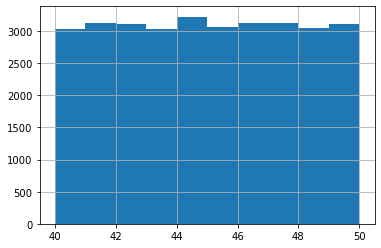

<IPython.core.display.Javascript object>

In [71]:
df[(df.age > 40) & (df.age < 50)].age.hist()

# Age

In [79]:
df.admission_type.unique()

array(['Emergency', 'Trauma', 'Urgent'], dtype=object)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The groups still need to be broken down into similar admission types and severity before running any tests on age. Running any age testing with members from all different groups should provide extremely indecisive results.

In [80]:
#  breaking Emergency admissions into 3 groups
emergency_minor = df[(df.admission_type == "Emergency") & (df.severity == "Minor")]
emergency_moderate = df[
    (df.admission_type == "Emergency") & (df.severity == "Moderate")
]
emergency_extreme = df[(df.admission_type == "Emergency") & (df.severity == "Extreme")]

#  breaking Trauma admissions into 3 groups
trauma_minor = df[(df.admission_type == "Trauma") & (df.severity == "Minor")]
trauma_moderate = df[(df.admission_type == "Trauma") & (df.severity == "Moderate")]
trauma_extreme = df[(df.admission_type == "Trauma") & (df.severity == "Extreme")]

#  breaking Urgent admissions into 3 groups
urgent_minor = df[(df.admission_type == "Urgent") & (df.severity == "Minor")]
urgent_moderate = df[(df.admission_type == "Urgent") & (df.severity == "Moderate")]
urgent_extreme = df[(df.admission_type == "Urgent") & (df.severity == "Extreme")]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Emergency

### Emergency Minor

In [113]:
## THESE VARIABLES MUST BE RUN TOGETHER BC P1-P3 ARE REUSED FOR EACH VARIABLE CALCULATION
#  find the 1st, 2nd, and 3rd percentiles of the group
p1 = np.percentile(emergency_minor.age, 25)
p2 = np.percentile(emergency_minor.age, 50)
p3 = np.percentile(emergency_minor.age, 75)

#  separate group into 4 even groups based on age
e_minor_age_1 = emergency_minor[emergency_minor.age < p1]
e_minor_age_2 = emergency_minor[(emergency_minor.age > p1) & (emergency_minor.age < p2)]
e_minor_age_3 = emergency_minor[(emergency_minor.age > p2) & (emergency_minor.age < p3)]
e_minor_age_4 = emergency_minor[emergency_minor.age > p3]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [114]:
#  check group sizes
print(
    "Emergency, Minor, group 1: "
    + str(emergency_minor[emergency_minor.age < p1].shape[0])
)
print(
    "Emergency, Minor, group 2: "
    + str(
        emergency_minor[(emergency_minor.age > p1) & (emergency_minor.age < p2)].shape[
            0
        ]
    )
)
print(
    "Emergency, Minor, group 3: "
    + str(
        emergency_minor[(emergency_minor.age > p2) & (emergency_minor.age < p3)].shape[
            0
        ]
    )
)
print(
    "Emergency, Minor, group 1: "
    + str(emergency_minor[emergency_minor.age > p3].shape[0])
)

Emergency, Minor, group 1: 8839
Emergency, Minor, group 2: 8839
Emergency, Minor, group 3: 8839
Emergency, Minor, group 1: 8839


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

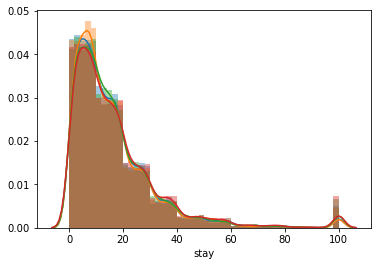

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [121]:
#  overlay of each groups distribution of stay length
sns.distplot(e_minor_age_1.stay)
sns.distplot(e_minor_age_2.stay)
sns.distplot(e_minor_age_3.stay)
sns.distplot(e_minor_age_4.stay)
plt.show()

**Plot Analysis:** 
* All 4 groups show a very similar distribution with a heavy right skew.
* The bumps at the far side of the plot is due to the max stay value of 100 including all stays of 100 days or more.

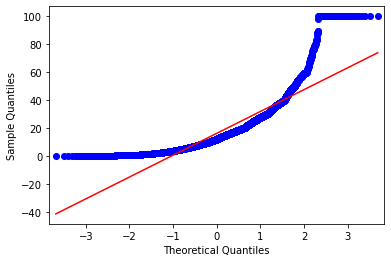

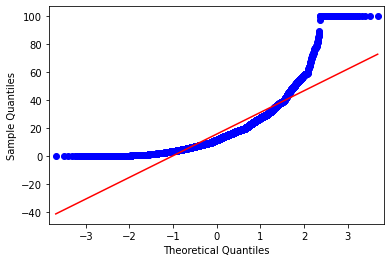

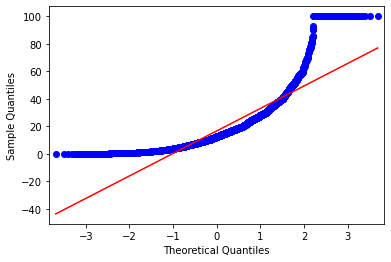

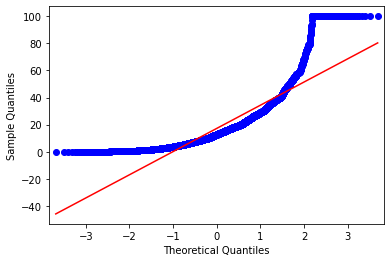

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [122]:
# qqplots for each groups length of stay
qqplot(e_minor_age_1.stay, line="s")
plt.show()
qqplot(e_minor_age_2.stay, line="s")
plt.show()
qqplot(e_minor_age_3.stay, line="s")
plt.show()
qqplot(e_minor_age_4.stay, line="s")
plt.show()

**Plot Analysis:** 
* The qqplots of each age groups length of stay don't appear to follow a very normal distribution. 
* The bumps at the far side of the plot is due to the max stay value of 100 including all stays of 100 days or more.

### Emergency Moderate

In [119]:
## THESE VARIABLES MUST BE RUN TOGETHER BC P1-P3 ARE REUSED FOR EACH VARIABLE CALCULATION
#  find the 1st, 2nd, and 3rd percentiles of the group
p1 = np.percentile(emergency_moderate.age, 25)
p2 = np.percentile(emergency_moderate.age, 50)
p3 = np.percentile(emergency_moderate.age, 75)

#  separate group into 4 even groups based on age
e_moderate_age_1 = emergency_moderate[emergency_moderate.age < p1]
e_moderate_age_2 = emergency_moderate[
    (emergency_moderate.age > p1) & (emergency_moderate.age < p2)
]
e_moderate_age_3 = emergency_moderate[
    (emergency_moderate.age > p2) & (emergency_moderate.age < p3)
]
e_moderate_age_4 = emergency_moderate[emergency_moderate.age > p3]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [120]:
#  check group sizes
print(
    "Emergency, Moderate, group 1: "
    + str(emergency_moderate[emergency_moderate.age < p1].shape[0])
)
print(
    "Emergency, Moderate, group 2: "
    + str(
        emergency_moderate[
            (emergency_moderate.age > p1) & (emergency_moderate.age < p2)
        ].shape[0]
    )
)
print(
    "Emergency, Moderate, group 3: "
    + str(
        emergency_moderate[
            (emergency_moderate.age > p2) & (emergency_moderate.age < p3)
        ].shape[0]
    )
)
print(
    "Emergency, Moderate, group 1: "
    + str(emergency_moderate[emergency_moderate.age > p3].shape[0])
)

Emergency, Minor, group 1: 15619
Emergency, Minor, group 2: 15619
Emergency, Minor, group 3: 15619
Emergency, Minor, group 1: 15619


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

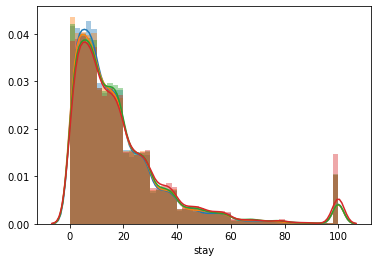

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [126]:
#  overlay of each groups distribution of stay length
sns.distplot(e_moderate_age_1.stay)
# plt.show()
sns.distplot(e_moderate_age_2.stay)
# plt.show()
sns.distplot(e_moderate_age_3.stay)
# plt.show()
sns.distplot(e_moderate_age_4.stay)
plt.show()

**Plot Analysis:**
* The youngest age group seems to have a slightly higher incidence of shorter stays
* the incidence of shorter stays seems to slightly decrease at higher age groups
* the oldest age group seems to have an incidence of the longest lengths of stay by around 30%
* the distributions and their right skew characteristics are consistent to that of the last groups; qqplots shouldn't be necessary

### Emergency Extreme

In [127]:
## THESE VARIABLES MUST BE RUN TOGETHER BC P1-P3 ARE REUSED FOR EACH VARIABLE CALCULATION
#  find the 1st, 2nd, and 3rd percentiles of the group
p1 = np.percentile(emergency_extreme.age, 25)
p2 = np.percentile(emergency_extreme.age, 50)
p3 = np.percentile(emergency_extreme.age, 75)

#  separate group into 4 even groups based on age
e_extreme_age_1 = emergency_extreme[emergency_extreme.age < p1]
e_extreme_age_2 = emergency_extreme[
    (emergency_extreme.age > p1) & (emergency_extreme.age < p2)
]
e_extreme_age_3 = emergency_extreme[
    (emergency_extreme.age > p2) & (emergency_extreme.age < p3)
]
e_extreme_age_4 = emergency_extreme[emergency_extreme.age > p3]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [128]:
#  check group sizes
print(
    "Emergency, Extreme, group 1: "
    + str(emergency_extreme[emergency_extreme.age < p1].shape[0])
)
print(
    "Emergency, Extreme, group 2: "
    + str(
        emergency_extreme[
            (emergency_extreme.age > p1) & (emergency_extreme.age < p2)
        ].shape[0]
    )
)
print(
    "Emergency, Extreme, group 3: "
    + str(
        emergency_extreme[
            (emergency_extreme.age > p2) & (emergency_extreme.age < p3)
        ].shape[0]
    )
)
print(
    "Emergency, Extreme, group 1: "
    + str(emergency_extreme[emergency_extreme.age > p3].shape[0])
)

Emergency, Extreme, group 1: 4961
Emergency, Extreme, group 2: 4961
Emergency, Extreme, group 3: 4961
Emergency, Extreme, group 1: 4961


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

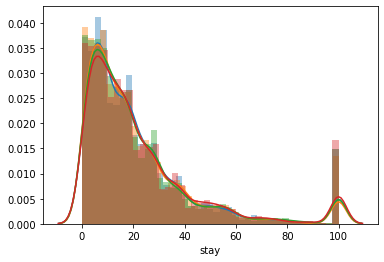

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [129]:
#  overlay of each groups distribution of stay length
sns.distplot(e_extreme_age_1.stay)
# plt.show()
sns.distplot(e_extreme_age_2.stay)
# plt.show()
sns.distplot(e_extreme_age_3.stay)
# plt.show()
sns.distplot(e_extreme_age_4.stay)
plt.show()

**Plot Analysis:**
* the same pattern of inverse incidence seen in the last plot seems to be even more extreme in this case
* as the age group shifts from lower to higher, the number of shorter stays decreases as longer stays increase

## Trauma

### Trauma Minor

In [130]:
## THESE VARIABLES MUST BE RUN TOGETHER BC P1-P3 ARE REUSED FOR EACH VARIABLE CALCULATION
#  find the 1st, 2nd, and 3rd percentiles of the group
p1 = np.percentile(trauma_minor.age, 25)
p2 = np.percentile(trauma_minor.age, 50)
p3 = np.percentile(trauma_minor.age, 75)

#  separate group into 4 even groups based on age
t_minor_age_1 = trauma_minor[trauma_minor.age < p1]
t_minor_age_2 = trauma_minor[(trauma_minor.age > p1) & (trauma_minor.age < p2)]
t_minor_age_3 = trauma_minor[(trauma_minor.age > p2) & (trauma_minor.age < p3)]
t_minor_age_4 = trauma_minor[trauma_minor.age > p3]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [140]:
#  check group sizes
print("Trauma, Minor, group 1: " + str(t_minor_age_1.shape[0]))
print("Trauma, Minor, group 2: " + str(t_minor_age_2.shape[0]))
print("Trauma, Minor, group 3: " + str(t_minor_age_3.shape[0]))
print("Trauma, Minor, group 1: " + str(t_minor_age_4.shape[0]))

Trauma, Minor, group 1: 9200
Trauma, Minor, group 2: 9200
Trauma, Minor, group 3: 9200
Trauma, Minor, group 1: 9200


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

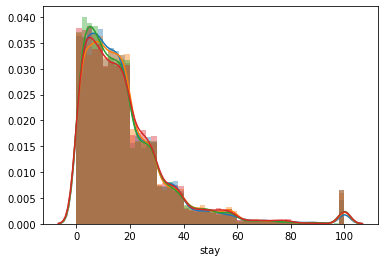

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [146]:
#  overlay of each groups distribution of stay length
sns.distplot(t_minor_age_1.stay)
sns.distplot(t_minor_age_2.stay)
sns.distplot(t_minor_age_3.stay)
sns.distplot(t_minor_age_4.stay)
plt.show()

### Trauma Moderate

In [131]:
## THESE VARIABLES MUST BE RUN TOGETHER BC P1-P3 ARE REUSED FOR EACH VARIABLE CALCULATION
#  find the 1st, 2nd, and 3rd percentiles of the group
p1 = np.percentile(trauma_moderate.age, 25)
p2 = np.percentile(trauma_moderate.age, 50)
p3 = np.percentile(trauma_moderate.age, 75)

#  separate group into 4 even groups based on age
t_moderate_age_1 = trauma_moderate[trauma_moderate.age < p1]
t_moderate_age_2 = trauma_moderate[
    (trauma_moderate.age > p1) & (trauma_moderate.age < p2)
]
t_moderate_age_3 = trauma_moderate[
    (trauma_moderate.age > p2) & (trauma_moderate.age < p3)
]
t_moderate_age_4 = trauma_moderate[trauma_moderate.age > p3]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [141]:
#  check group sizes
print("Trauma, Moderate, group 1: " + str(t_moderate_age_1.shape[0]))
print("Trauma, Moderate, group 2: " + str(t_moderate_age_2.shape[0]))
print("Trauma, Moderate, group 3: " + str(t_moderate_age_3.shape[0]))
print("Trauma, Moderate, group 1: " + str(t_moderate_age_4.shape[0]))

Trauma, Moderate, group 1: 21656
Trauma, Moderate, group 2: 21656
Trauma, Moderate, group 3: 21656
Trauma, Moderate, group 1: 21656


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

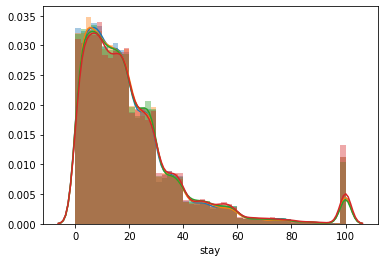

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [147]:
#  overlay of each groups distribution of stay length
sns.distplot(t_moderate_age_1.stay)
sns.distplot(t_moderate_age_2.stay)
sns.distplot(t_moderate_age_3.stay)
sns.distplot(t_moderate_age_4.stay)
plt.show()

### Trauma Extreme

In [132]:
## THESE VARIABLES MUST BE RUN TOGETHER BC P1-P3 ARE REUSED FOR EACH VARIABLE CALCULATION
#  find the 1st, 2nd, and 3rd percentiles of the group
p1 = np.percentile(trauma_extreme.age, 25)
p2 = np.percentile(trauma_extreme.age, 50)
p3 = np.percentile(trauma_extreme.age, 75)

#  separate group into 4 even groups based on age
t_extreme_age_1 = trauma_extreme[trauma_extreme.age < p1]
t_extreme_age_2 = trauma_extreme[(trauma_extreme.age > p1) & (trauma_extreme.age < p2)]
t_extreme_age_3 = trauma_extreme[(trauma_extreme.age > p2) & (trauma_extreme.age < p3)]
t_extreme_age_4 = trauma_extreme[trauma_extreme.age > p3]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [142]:
#  check group sizes
print("Trauma, Extreme, group 1: " + str(t_extreme_age_1.shape[0]))
print("Trauma, Extreme, group 2: " + str(t_extreme_age_2.shape[0]))
print("Trauma, Extreme, group 3: " + str(t_extreme_age_3.shape[0]))
print("Trauma, Extreme, group 1: " + str(t_extreme_age_4.shape[0]))

Trauma, Extreme, group 1: 7209
Trauma, Extreme, group 2: 7208
Trauma, Extreme, group 3: 7208
Trauma, Extreme, group 1: 7209


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

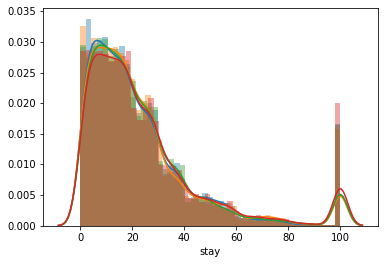

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [148]:
#  overlay of each groups distribution of stay length
sns.distplot(t_extreme_age_1.stay)
sns.distplot(t_extreme_age_2.stay)
sns.distplot(t_extreme_age_3.stay)
sns.distplot(t_extreme_age_4.stay)
plt.show()

## Urgent

### Urgent Minor

In [133]:
## THESE VARIABLES MUST BE RUN TOGETHER BC P1-P3 ARE REUSED FOR EACH VARIABLE CALCULATION
#  find the 1st, 2nd, and 3rd percentiles of the group
p1 = np.percentile(urgent_minor.age, 25)
p2 = np.percentile(urgent_minor.age, 50)
p3 = np.percentile(urgent_minor.age, 75)

#  separate group into 4 even groups based on age
u_minor_age_1 = urgent_minor[urgent_minor.age < p1]
u_minor_age_2 = urgent_minor[(urgent_minor.age > p1) & (urgent_minor.age < p2)]
u_minor_age_3 = urgent_minor[(urgent_minor.age > p2) & (urgent_minor.age < p3)]
u_minor_age_4 = urgent_minor[urgent_minor.age > p3]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [143]:
#  check group sizes
print("Urgent, Minor group 1: " + str(u_minor_age_1.shape[0]))
print("Urgent, Minor group 2: " + str(u_minor_age_2.shape[0]))
print("Urgent, Minor group 3: " + str(u_minor_age_3.shape[0]))
print("Urgent, Minor group 1: " + str(u_minor_age_4.shape[0]))

Urgent, Minor group 1: 3429
Urgent, Minor group 2: 3429
Urgent, Minor group 3: 3429
Urgent, Minor group 1: 3429


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

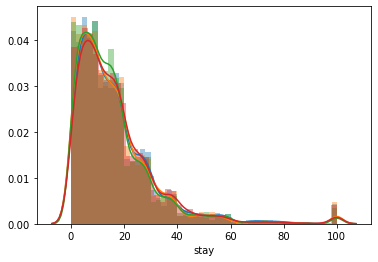

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [149]:
#  overlay of each groups distribution of stay length
sns.distplot(u_minor_age_1.stay)
sns.distplot(u_minor_age_2.stay)
sns.distplot(u_minor_age_3.stay)
sns.distplot(u_minor_age_4.stay)
plt.show()

### Urgent Moderate

In [134]:
## THESE VARIABLES MUST BE RUN TOGETHER BC P1-P3 ARE REUSED FOR EACH VARIABLE CALCULATION
#  find the 1st, 2nd, and 3rd percentiles of the group
p1 = np.percentile(urgent_moderate.age, 25)
p2 = np.percentile(urgent_moderate.age, 50)
p3 = np.percentile(urgent_moderate.age, 75)

#  separate group into 4 even groups based on age
u_moderate_age_1 = urgent_moderate[urgent_moderate.age < p1]
u_moderate_age_2 = urgent_moderate[
    (urgent_moderate.age > p1) & (urgent_moderate.age < p2)
]
u_moderate_age_3 = urgent_moderate[
    (urgent_moderate.age > p2) & (urgent_moderate.age < p3)
]
u_moderate_age_4 = urgent_moderate[urgent_moderate.age > p3]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [144]:
#  check group sizes
print("Urgent, Moderate, group 1: " + str(u_moderate_age_1.shape[0]))
print("Urgent, Moderate, group 2: " + str(u_moderate_age_2.shape[0]))
print("Urgent, Moderate, group 3: " + str(u_moderate_age_3.shape[0]))
print("Urgent, Moderate, group 1: " + str(u_moderate_age_4.shape[0]))

Urgent, Moderate, group 1: 6686
Urgent, Moderate, group 2: 6685
Urgent, Moderate, group 3: 6685
Urgent, Moderate, group 1: 6686


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

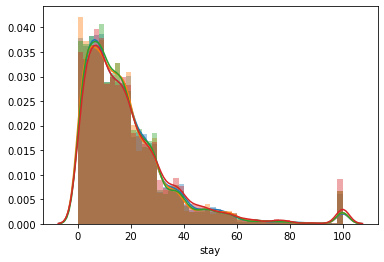

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [150]:
#  overlay of each groups distribution of stay length
sns.distplot(u_moderate_age_1.stay)
sns.distplot(u_moderate_age_2.stay)
sns.distplot(u_moderate_age_3.stay)
sns.distplot(u_moderate_age_4.stay)
plt.show()

### Urgent Extreme

In [135]:
## THESE VARIABLES MUST BE RUN TOGETHER BC P1-P3 ARE REUSED FOR EACH VARIABLE CALCULATION
#  find the 1st, 2nd, and 3rd percentiles of the group
p1 = np.percentile(urgent_extreme.age, 25)
p2 = np.percentile(urgent_extreme.age, 50)
p3 = np.percentile(urgent_extreme.age, 75)

#  separate group into 4 even groups based on age
u_extreme_age_1 = urgent_extreme[urgent_extreme.age < p1]
u_extreme_age_2 = urgent_extreme[(urgent_extreme.age > p1) & (urgent_extreme.age < p2)]
u_extreme_age_3 = urgent_extreme[(urgent_extreme.age > p2) & (urgent_extreme.age < p3)]
u_extreme_age_4 = urgent_extreme[urgent_extreme.age > p3]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [145]:
#  check group sizes
print("Urgent, Extreme, group 1: " + str(u_extreme_age_1.shape[0]))
print("Urgent, Extreme, group 2: " + str(u_extreme_age_2.shape[0]))
print("Urgent, Extreme, group 3: " + str(u_extreme_age_3.shape[0]))
print("Urgent, Extreme, group 1: " + str(u_extreme_age_4.shape[0]))

Urgent, Extreme, group 1: 2011
Urgent, Extreme, group 2: 2010
Urgent, Extreme, group 3: 2010
Urgent, Extreme, group 1: 2011


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

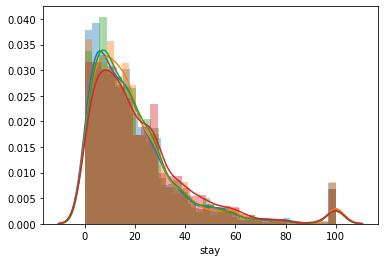

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [151]:
#  overlay of each groups distribution of stay length
sns.distplot(u_extreme_age_1.stay)
sns.distplot(u_extreme_age_2.stay)
sns.distplot(u_extreme_age_3.stay)
sns.distplot(u_extreme_age_4.stay)
plt.show()